In [203]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
from numpy import float64

x_data = pd.read_csv("x_data.csv", delimiter='	', dtype=float64)
y_data = pd.read_csv("y_data.csv", delimiter='	', dtype=float64)
x_data
y_data

,y1,y2,y3,y4
0,1.06,0.08,0.00,1.03
1,1.90,1.10,1.72,0.80
2,1.21,-0.12,-0.08,1.04
3,0.88,0.91,1.27,0.86
4,0.92,1.00,1.07,1.11
...,...,...,...,...
195,0.83,0.98,1.06,0.93
196,2.10,0.81,1.79,1.10
197,0.93,0.87,1.19,0.86
198,0.90,0.17,0.01,1.04


### Матрица расстояний
![Основные функции растояний](img.png)

### Расчет матрицы расстояний

In [205]:
# Евклидовы расстояния
x_distances = squareform(pdist(x_data, metric='euclidean'))  # Матрица расстояний для X
y_distances = squareform(pdist(y_data, metric='euclidean'))  # Матрица расстояний для Y

# Вывод матриц расстояний
print("Distance Matrix for X data")
pd.DataFrame(x_distances)

Distance Matrix for X data


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,2.687917,3.214949,2.909880,2.904996,2.902568,3.071514,0.800875,3.269587,1.505390,...,0.852877,2.099190,0.782432,1.639848,0.725603,2.217453,2.354995,2.256081,2.086001,0.390768
1,2.687917,0.000000,0.687895,0.504083,0.673573,0.522494,0.836600,2.051219,1.144421,1.854751,...,2.994144,1.516740,3.142626,1.165247,3.053752,0.811665,0.401622,0.567274,0.643661,2.327789
2,3.214949,0.687895,0.000000,0.307083,0.391280,0.318434,0.371080,2.498740,0.596574,2.117239,...,3.614236,2.201431,3.744209,1.813119,3.655653,1.499066,1.082913,1.251958,1.296495,2.834819
3,2.909880,0.504083,0.307083,0.000000,0.193907,0.026458,0.333167,2.191712,0.640469,1.824938,...,3.325267,2.003197,3.449696,1.544506,3.361354,1.293947,0.859186,1.029223,1.039904,2.528814
4,2.904996,0.673573,0.391280,0.193907,0.000000,0.168226,0.190263,2.161759,0.488057,1.737585,...,3.365680,2.139720,3.478333,1.625269,3.390678,1.432585,0.994082,1.160733,1.142366,2.518750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.217453,0.811665,1.499066,1.293947,1.432585,1.307287,1.614466,1.775753,1.920078,1.887935,...,2.336472,0.709295,2.516962,0.580172,2.429856,0.000000,0.438520,0.276043,0.399124,1.918489
196,2.354995,0.401622,1.082913,0.859186,0.994082,0.871378,1.176520,1.780955,1.481688,1.717964,...,2.609176,1.146386,2.765899,0.776338,2.677181,0.438520,0.000000,0.170587,0.269444,2.012039
197,2.256081,0.567274,1.251958,1.029223,1.160733,1.041057,1.344582,1.725775,1.648727,1.733695,...,2.469555,0.979030,2.633344,0.642028,2.544917,0.276043,0.170587,0.000000,0.205670,1.926499
198,2.086001,0.643661,1.296495,1.039904,1.142366,1.046852,1.331766,1.528332,1.626100,1.531078,...,2.351042,1.037593,2.502838,0.522207,2.414022,0.399124,0.269444,0.205670,0.000000,1.745652


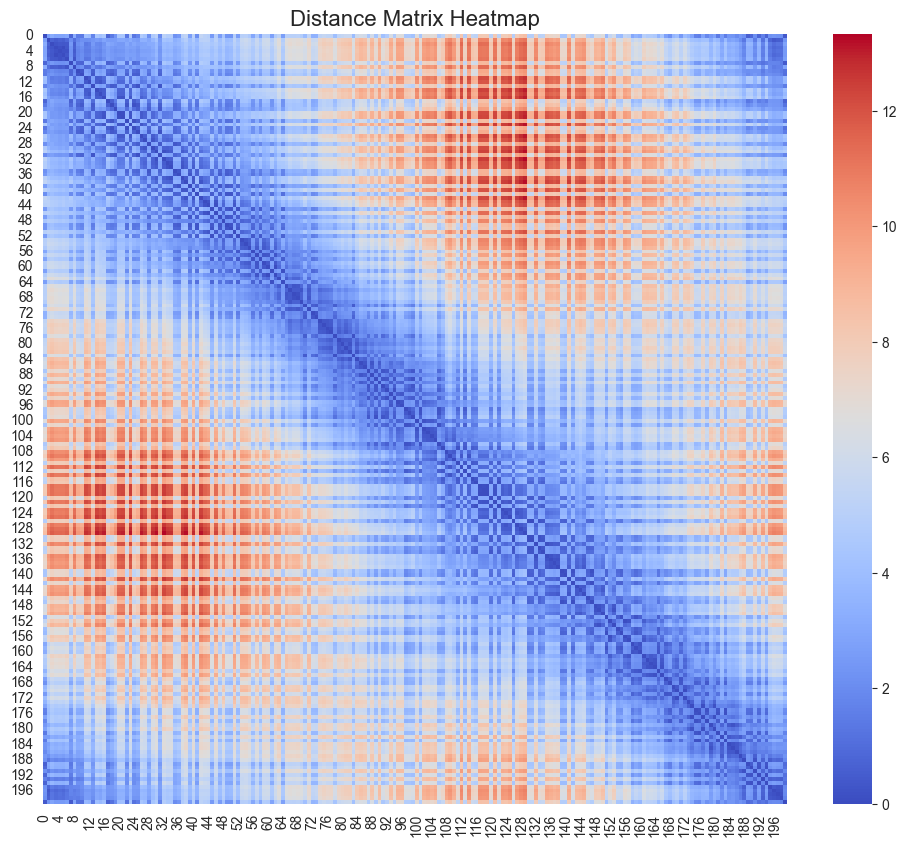

In [206]:
# Преобразуем в numpy массив
matrix = np.array(x_distances)

# Визуализация матрицы с помощью heatmap
plt.figure(figsize=(12, 10)) # Установим размер графика
sns.heatmap(matrix, cmap="coolwarm", annot=False)  # Используем тепловую карту (heatmap)
plt.title("Distance Matrix Heatmap", fontsize=16)
plt.show()

Эта тепловая карта Евклидовых расстояний отражает степень сходства между различными объектами или точками данных. По этой карте можно сделать несколько наблюдений:

1. **Диагональ (минимальные расстояния)**:
   - Главная диагональ тепловой карты показывает расстояние объекта до самого себя, которое равно нулю (соответствует минимальному значению, поэтому показана наиболее насыщенным синим цветом).
   - Это свидетельствует о внутренней согласованности матрицы расстояний.

2. **Группировки (кластеризация)**:
   - Области с насыщенным синим цветом указывают на группы точек данных, которые близки друг к другу (имеют небольшие Евклидовы расстояния). Это свидетельствует о наличии кластеров в данных.
   - Например, на тепловой карте видно несколько синих прямоугольных регионов, особенно в начале и в средней части матрицы. Это предполагает, что данные могут быть распределены по нескольким хорошо определенным кластерам.

3. **Отдаленные объекты (красные зоны)**:
   - Красные участки на карте указывают на большие значения Евклидовых расстояний между точками данных. Это может свидетельствовать о том, что некоторые объекты существенно отличаются друг от друга или принадлежат разным группам/кластеров.

4. **Симметричность матрицы**:
   - Матрица Евклидовых расстояний симметрична, что подтверждается симметрией тепловой карты относительно главной диагонали.


**Возможные выводы**:
- Наблюдаются 2-3 возможных кластера в наборе данных.
- Существует высокая внутрикластерная однородность (синие области внутри кластеров) и значимые межкластерные различия (контрастные красные пятна между кластерами).
- Могут быть участки с частичной схожестью между объектами, например, полосы, где кластеры могут частично пересекаться.


In [207]:
# Вывод матриц расстояний
print("Distance Matrix for X data")
pd.DataFrame(y_distances)

Distance Matrix for X data


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,2.181124,0.262679,1.537238,1.420317,0.352136,2.196247,2.565814,0.214942,2.327767,...,2.215604,0.124900,2.403227,1.237013,2.289214,1.412976,2.196247,1.444299,0.184120,2.352297
1,2.181124,0.000000,2.293927,1.132519,1.220246,2.154553,0.164317,0.616685,2.108341,0.285307,...,0.260000,2.172809,0.464973,1.408013,0.365240,1.269567,0.467974,1.130619,2.201499,0.414005
2,0.262679,2.293927,0.000000,1.739166,1.632758,0.250998,2.295321,2.652169,0.473075,2.436124,...,2.310000,0.266458,2.496978,1.453547,2.372994,1.632820,2.271013,1.644324,0.433935,2.453182
3,1.537238,1.132519,1.739166,0.000000,0.334963,1.623422,1.192225,1.507216,1.383871,1.211198,...,1.302075,1.555281,1.349444,0.587792,1.341268,0.237487,1.351444,0.102470,1.472413,1.251399
4,1.420317,1.220246,1.632758,0.334963,0.000000,1.521348,1.294990,1.628036,1.253196,1.360735,...,1.339179,1.452687,1.450931,0.281957,1.425132,0.202485,1.395349,0.306431,1.348258,1.384558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.412976,1.269567,1.632820,0.237487,0.202485,1.537043,1.343354,1.688046,1.244227,1.386001,...,1.417110,1.434817,1.519144,0.415331,1.493653,0.000000,1.484453,0.209523,1.332516,1.433178
196,2.196247,0.467974,2.271013,1.351444,1.395349,2.098928,0.367423,0.492037,2.146602,0.551543,...,0.323419,2.200750,0.350714,1.524959,0.199499,1.484453,0.000000,1.337946,2.240893,0.439545
197,1.444299,1.130619,1.644324,0.102470,0.306431,1.530882,1.188318,1.523220,1.294836,1.222906,...,1.289612,1.460411,1.361066,0.536843,1.337572,0.209523,1.337946,0.000000,1.384088,1.266294
198,0.184120,2.201499,0.433935,1.472413,1.348258,0.503488,2.225444,2.596632,0.103441,2.347552,...,2.250200,0.257876,2.430514,1.158749,2.327187,1.332516,2.240893,1.384088,0.000000,2.374447


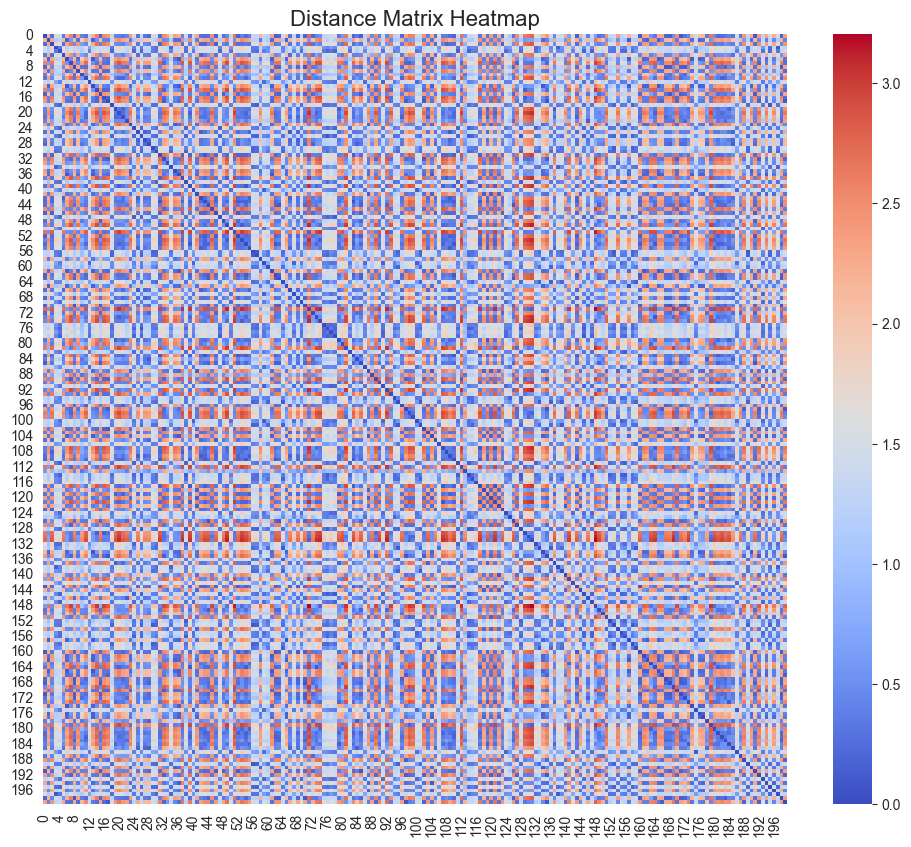

In [208]:
# Преобразуем в numpy массив
matrix = np.array(y_distances)

# Визуализация матрицы с помощью heatmap
plt.figure(figsize=(12, 10)) # Установим размер графика
sns.heatmap(matrix, cmap="coolwarm", annot=False)  # Используем тепловую карту (heatmap)
plt.title("Distance Matrix Heatmap", fontsize=16)
plt.show()

Эта тепловая карта показывает Евклидовы расстояния между парами объектов в наборах данных, что может быть связано с анализом кластеризации, поиском сходства или изучением структуры данных. Для получения информации из такой диаграммы можно обратить внимание на следующее:

1. **Диагональ**:
   - Диагональные элементы тепловой карты (слева налево сверху вниз) всегда равны нулю, так как Евклидово расстояние между объектом и самим собой равняется нулю. Это обычный признак правильного расчета матрицы расстояний.

2. **Шаблоны и кластеры**:
   - Повторяющиеся или крупные цветовые блоки вдоль диагонали могут указывать на группы (кластеры) объектов, которые близки друг к другу. Например, похожие объекты образуют четкие квадратные области.
   - В данной карте прослеживаются повторяющиеся структуры, что говорит о наличии возможных групп в данных.

3. **Контрасты**:
   - Красные оттенки могут отражать большие Евклидовы расстояния (меньшую схожесть), а синие — меньшие расстояния (более близкие объекты).
   - Более равномерно распределенные оттенки говорят о том, что объекты менее явно группируются, тогда как четкие изменения говорят о явной кластерной структуре.

4. **Симметричность**:
   - Матрица должна быть симметричной относительно диагонали, так как Евклидово расстояние между объектами не зависит от порядка (расстояние \(d(i, j) = d(j, i)\)).

**Вывод**: С данной карты видно, что данные имеют структуру с четкими группами (кластерные блоки), а также присутствует некоторая повторяемость или регулярность в данных.

### Расчет матрицы близостей и построение графовой модели

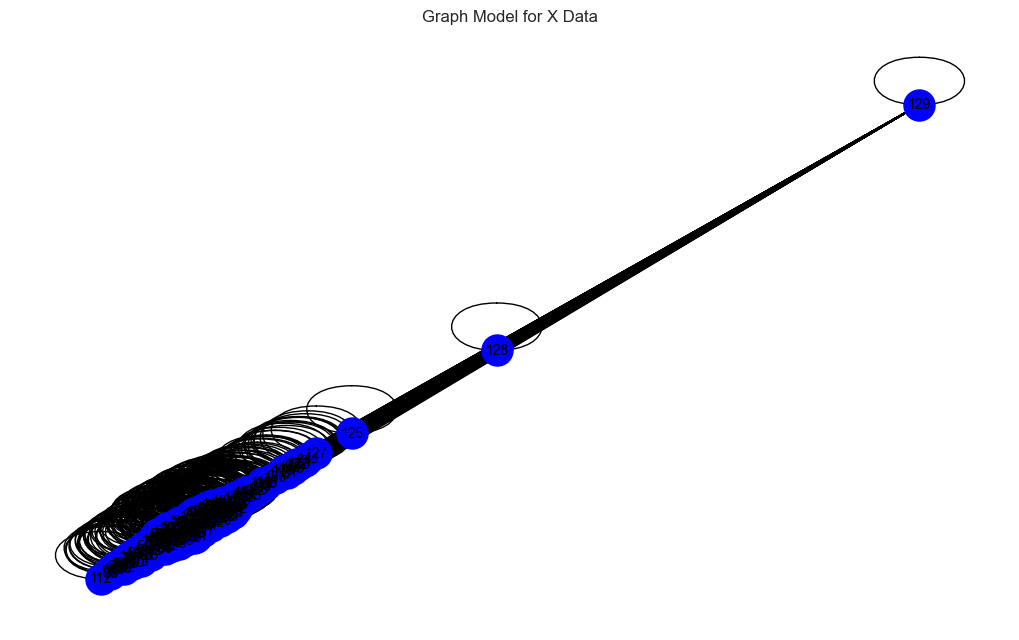

In [209]:
# Преобразование расстояний в близости (пример с использованием cosine_similarity)
x_similarity = cosine_similarity(x_data)
y_similarity = cosine_similarity(y_data)

# Построение графовой модели (полного, взвешенного, неориентированного)
x_graph = nx.Graph(x_similarity)
y_graph = nx.Graph(y_similarity)

# Визуализация графа (пример для X данных)
plt.figure(figsize=(10, 6))
nx.draw(x_graph, with_labels=True, node_color='blue', node_size=500, font_size=10)
plt.title("Graph Model for X Data")
plt.show()

Данная графовая модель представляет собой граф, построенный на основе матрицы схожести (similarity), полученной с использованием функции **cosine_similarity**. Граф отражает отношения между объектами в данных \( X \) с точки зрения их косинусной близости. Это объясняет, насколько похожи объекты друг на друга по значениям признаков в многомерном пространстве.

### Что можно понять по графу:
1. **Характер структуры данных**:
   - Граф имеет узлы и взвешенные ребра. Узлы (номера указаны) представляют данные (объекты), а взвешенные ребра указывают на косинусную близость между ними.
   - Плотный кластер в правой части (узлы с высокой связностью) говорит о группе объектов, которые имеют высокую схожесть между собой. Это показывает сильный кластер или группу в данных.
   - Левый узел или несколько объектов (например, узлы 125, 128, 129) находятся на периферии графа, они не связаны плотно с центром. Это может указывать на "выбросы" или менее похожие элементы.

2. **Распределение признаков**:
   Граф отображает, насколько равномерно распределены похожие объекты. Здесь заметна однородная группа объектов, отделенная от других.

3. **Понятие близости**:
   Взвешенность (толщина ребер и структура плотности) отражает степень близости:
   - Более толстые ребра говорят о высокой схожести.
   - Узлы, соединенные тонкими ребрами или вообще не соединенные, отражают низкую схожесть.

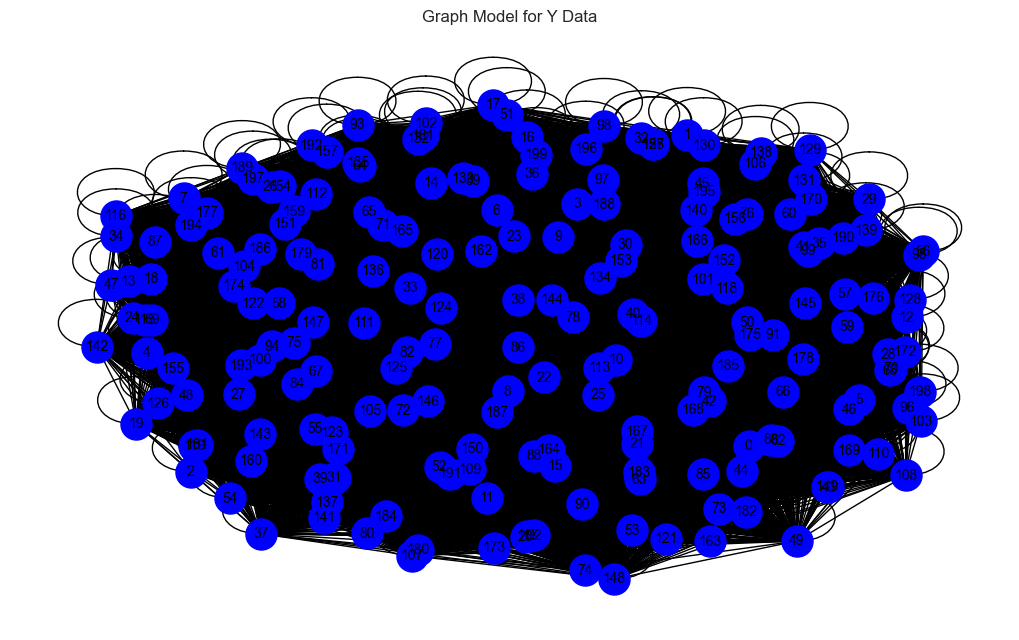

In [210]:
# Визуализация графа (пример для Y данных)
plt.figure(figsize=(10, 6))
nx.draw(y_graph, with_labels=True, node_color='blue', node_size=500, font_size=10)
plt.title("Graph Model for Y Data")
plt.show()

Графовая модель данных, представленная на изображении, строится на основе похожести между объектами данных \( Y \), измеренной через косинусную меру сходства. Рассмотрим шаги анализа и смысл такой модели:

### О чем говорит графовая модель:
1. **Объекты данных как узлы графа**:
   - Каждый узел графа представляет объект данных \( Y \), интерпретируемый как вектор в многомерном пространстве.

2. **Ребра и связи**:
   - Ребра между узлами отражают степень сходства между объектами. Чем больше косинусная похожесть (\( cosine\_similarity \)), тем больше "вес" или значение ребра.

3. **Плотность графа**:
   - Этот граф — полный (между каждой парой узлов есть связь), что объясняет большое количество линий.
   - Высокая плотность указывает на то, что данные в \( Y \) близки друг к другу в терминах косинусной похожести.

## 1. Кластеризация на 2 кластера

### 1.1 Алгоритмы кластеризации:

#### Метод иерархической кластеризации (Ward Linkage)

In [211]:
from sklearn.cluster import AgglomerativeClustering

# Ward Linkage для данных напрямую (без precomputed матрицы)
hierarchical_clust_x = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clust_y = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Фит и предсказания кластеров
x_clusters_hierarchical = hierarchical_clust_x.fit_predict(x_similarity)
y_clusters_hierarchical = hierarchical_clust_y.fit_predict(y_similarity)

print("X clusters with Ward Linkage:", x_clusters_hierarchical)
print("Y clusters with Ward Linkage:", y_clusters_hierarchical)


X clusters with Ward Linkage: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with Ward Linkage: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


#### K-means

In [212]:
# K-means для матрицы расстояний
kmeans = KMeans(n_clusters=2, random_state=42)
x_clusters_kmeans = kmeans.fit_predict(x_similarity)
y_clusters_kmeans = kmeans.fit_predict(y_similarity)

print("X clusters with K-means:", x_clusters_kmeans)
print("Y clusters with K-means:", y_clusters_kmeans)

X clusters with K-means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with K-means: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### EM алгоритм

In [213]:
# EM алгоритм (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=2, random_state=42)
x_clusters_em = gmm.fit_predict(x_similarity)
y_clusters_em = gmm.fit_predict(y_similarity)

print("X clusters with EM:", x_clusters_em)
print("Y clusters with EM:", y_clusters_em)

X clusters with EM: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with EM: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


#### Спектральная кластеризация

In [214]:
from sklearn.cluster import SpectralClustering

# Пример использования Normalized Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
x_clusters_spectral = spectral.fit_predict(x_similarity)
y_clusters_spectral = spectral.fit_predict(y_similarity)

print("X clusters with Spectral Clustering:", x_clusters_spectral)
print("Y clusters with Spectral Clustering:", y_clusters_spectral)

X clusters with Spectral Clustering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Y clusters with Spectral Clustering: [1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]


### 1.2 Сравнение попарных разбиений с помощью RAND индекса

In [215]:
# Сравнение кластеризаций (например, для X данных)
rand_index_1_2 = rand_score(x_clusters_hierarchical, x_clusters_kmeans)
rand_index_1_3 = rand_score(x_clusters_hierarchical, x_clusters_em)
rand_index_1_4 = rand_score(x_clusters_hierarchical, x_clusters_spectral)

print("RAND Index between Hierarchical and K-means for X:", rand_index_1_2)
print("RAND Index between Hierarchical and EM for X:", rand_index_1_3)
print("RAND Index between Hierarchical and Spectral for X:", rand_index_1_4)

rand_index_2_3 = rand_score(x_clusters_kmeans, x_clusters_em)
rand_index_2_4 = rand_score(x_clusters_kmeans, x_clusters_spectral)

print()
print("RAND Index between K-means and EM for X:", rand_index_2_3)
print("RAND Index between K-means and Spectral for X:", rand_index_2_4)

rand_index_3_4 = rand_score(x_clusters_em, x_clusters_spectral)

print()
print("RAND Index between EM and Spectral for X:", rand_index_3_4)

RAND Index between Hierarchical and K-means for X: 0.9801005025125629
RAND Index between Hierarchical and EM for X: 0.9606030150753769
RAND Index between Hierarchical and Spectral for X: 0.7437185929648241

RAND Index between K-means and EM for X: 0.9801005025125629
RAND Index between K-means and Spectral for X: 0.7298492462311558

RAND Index between EM and Spectral for X: 0.7163819095477387


In [216]:
# Сравнение кластеризаций (например, для X данных)
rand_index_1_2 = rand_score(y_clusters_hierarchical, y_clusters_kmeans)
rand_index_1_3 = rand_score(y_clusters_hierarchical, y_clusters_em)
rand_index_1_4 = rand_score(y_clusters_hierarchical, y_clusters_spectral)

print("RAND Index between Hierarchical and K-means for Y:", rand_index_1_2)
print("RAND Index between Hierarchical and EM for Y:", rand_index_1_3)
print("RAND Index between Hierarchical and Spectral for Y:", rand_index_1_4)

rand_index_2_3 = rand_score(y_clusters_kmeans, y_clusters_em)
rand_index_2_4 = rand_score(y_clusters_kmeans, y_clusters_spectral)

print()
print("RAND Index between K-means and EM for Y:", rand_index_2_3)
print("RAND Index between K-means and Spectral for Y:", rand_index_2_4)

rand_index_3_4 = rand_score(y_clusters_em, y_clusters_spectral)

print()
print("RAND Index between EM and Spectral for Y:", rand_index_3_4)

RAND Index between Hierarchical and K-means for Y: 1.0
RAND Index between Hierarchical and EM for Y: 1.0
RAND Index between Hierarchical and Spectral for Y: 1.0

RAND Index between K-means and EM for Y: 1.0
RAND Index between K-means and Spectral for Y: 1.0

RAND Index between EM and Spectral for Y: 1.0


### 1.3 Вычисление функции модулярности (по графу)

In [217]:
from networkx.algorithms.community import modularity
from networkx.algorithms.community import asyn_lpa_communities

# Получение коммьюнити графа для X данных по одному из методов кластеризации
x_communities = [set(np.where(x_clusters_hierarchical == c)[0]) for c in np.unique(x_clusters_hierarchical)]
modularity_x = modularity(x_graph, x_communities)
print("Modularity for X data with Hierarchical Clustering:", modularity_x)

# Аналогично для Y данных
y_communities = [set(np.where(y_clusters_hierarchical == c)[0]) for c in np.unique(y_clusters_hierarchical)]
modularity_y = modularity(y_graph, y_communities)
print("Modularity for Y data with Hierarchical Clustering:", modularity_y)

Modularity for X data with Hierarchical Clustering: 0.03876485336420646
Modularity for Y data with Hierarchical Clustering: 0.08607410190435333


### 1.4 Сделать общие выводы по возможности разбиения на 2 кластера каждого набора данных.

В данном задании произведена кластеризация двух наборов данных \(X\) и \(Y\) с использованием нескольких алгоритмов: иерархической кластеризации (Ward Linkage), K-means, EM (Gaussian Mixture Model) и спектральной кластеризации. На основании полученных кластеров и расчетов индекса RAND можно сделать следующие выводы о возможности разбиения данных \(X\) и \(Y\) на 2 кластера:

### 1. **Набор данных \(X\):**
- **Сравнение кластеризаций:**
  - RAND Index между различными методами (относительная схожесть кластеризаций) показывает значительные различия в результатах между методами. Например:
    - Высокая схожесть между иерархической кластеризацией и K-means (RAND = 0.98), а также между K-means и EM (RAND = 0.98).
    - Однако спектральная кластеризация показывает сильное отличие от других методов, особенно в сравнении с EM и K-means (RAND = 0.729 и RAND = 0.716 соответственно).
  - Это указывает на то, что структура данных \(X\) относительно сложная, и разные алгоритмы выявляют разные разбиения.

- **Особенности алгоритмов:**
  - Иерархическая кластеризация, K-means и EM дают схожую структуру кластеров, что указывает на то, что \(X\) имеет устойчивую кластерную структуру для первых трех методов.
  - Спектральная кластеризация выделяет иные кластеры, что может свидетельствовать о наличии сложных (нелинейных) кластеров или о трудности разбиения \(X\) на 2 четко выраженных кластера.

- **Вывод по данным \(X\):**
  - Разделение набора данных \(X\) на 2 кластера возможно, однако есть известные трудности — результаты алгоритмов используют разные подходы, что приводит к отличиям. Это может указывать на нечетко выраженную границу между кластерами.

---

### 2. **Набор данных \(Y\):**
- **Сравнение кластеризаций:**
  - RAND Index между всеми методами равен 1.0. Это свидетельствует о том, что все алгоритмы дают идентичные результаты кластеризации, независимо от метода.
  - Значение RAND = 1.0 указывает на однозначное и устойчивое разбиение набора данных \(Y\) на 2 кластера.

- **Особенности алгоритмов:**
  - Все алгоритмы успешно определили одну и ту же структуру кластеров в данных \(Y\). Это может свидетельствовать о том, что кластерная структура \(Y\) четко выражена, а переход между кластерами хорошо виден.

- **Вывод по данным \(Y\):**
  - Набор данных \(Y\) однозначно поддается разбиению на 2 кластера, так как независимо от алгоритмов, их результаты полностью совпадают.

---

### 3. **Общие выводы:**
- **Для \(X\):**
  - Разбиение возможно, но результаты зависят от алгоритма — возможны сложности с четкой интерпретацией кластеров. Это может быть связано с пересечением или отсутствием ярко выраженных границ между кластерами.
- **Для \(Y\):**
  - Данные отлично поддаются разбиению на 2 кластера, так как результаты согласуются между всеми алгоритмами.

### 4. **Рекомендация:**
- Для \(X\): Рекомендуется дальнейший анализ структуры данных (например, визуализация, проверка корреляций, поиск числа кластеров с помощью метрик вроде silhouette score).
- Для \(Y\): Данные имеют четкие кластеры, и выбранное разбиение на 2 группы корректно.

# 2 Кластеризация для числа кластеров k=3.

## 2.1. Кластеризация на 3 кластера

#### Метод иерархической кластеризации (Ward Linkage)


In [218]:
### 2.1 Алгоритмы кластеризации:

#### Метод иерархической кластеризации (Ward Linkage)from sklearn.cluster import AgglomerativeClustering

# Ward Linkage для данных напрямую (без precomputed матрицы)
hierarchical_clust_x2 = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_clust_y2 = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Фит и предсказания кластеров
x_clusters_hierarchical2 = hierarchical_clust_x2.fit_predict(x_similarity)
y_clusters_hierarchical2 = hierarchical_clust_y2.fit_predict(y_similarity)

print("X clusters with Ward Linkage:", x_clusters_hierarchical2)
print("Y clusters with Ward Linkage:", y_clusters_hierarchical2)


X clusters with Ward Linkage: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 2 2 1 1 1 2 1 2 1 1 1 2 1 1 1 2 2 1 2 2 1 1 1 1 2 2 1 2 1 1 1 2 2
 1 1 1 2 1 1 2 2 1 1 2 2 2 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Y clusters with Ward Linkage: [1 0 2 0 0 1 0 0 1 0 1 2 0 0 0 1 0 0 0 1 2 1 1 0 0 1 0 1 1 0 0 2 0 0 0 0 0
 2 0 2 0 0 1 2 1 0 1 0 1 2 0 0 1 2 2 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 2
 2 0 0 0 0 1 2 0 0 2 1 1 0 0 1 0 2 0 2 0 0 0 1 0 0 0 0 0 0 1 0 1 0 2 2 1 2
 0 0 1 0 0 0 2 0 1 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 0 1 0
 2 2 1 0 0 0 0 0 0 0 0 0 1 0 0 2 2 0 0 1 1 2 0 1 1 2 0 0 0 0 1 0 2 1 2 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]


#### K-means


In [219]:
# K-means для матрицы расстояний
kmeans2 = KMeans(n_clusters=3, random_state=42)
x_clusters_kmeans2 = kmeans.fit_predict(x_similarity)
y_clusters_kmeans2 = kmeans.fit_predict(y_similarity)

print("X clusters with K-means:", x_clusters_kmeans2)
print("Y clusters with K-means:", y_clusters_kmeans2)

X clusters with K-means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with K-means: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### EM алгоритм

In [220]:
# EM алгоритм (Gaussian Mixture Model)
gmm2 = GaussianMixture(n_components=3, random_state=42)
x_clusters_em2 = gmm.fit_predict(x_similarity)
y_clusters_em2 = gmm.fit_predict(y_similarity)

print("X clusters with EM:", x_clusters_em2)
print("Y clusters with EM:", y_clusters_em2)

X clusters with EM: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y clusters with EM: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


#### Спектральная кластеризация

In [221]:
from sklearn.cluster import SpectralClustering

# Пример использования Normalized Spectral Clustering
spectral2 = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
x_clusters_spectral2 = spectral.fit_predict(x_similarity)
y_clusters_spectral2 = spectral.fit_predict(y_similarity)

print("X clusters with Spectral Clustering:", x_clusters_spectral2)
print("Y clusters with Spectral Clustering:", y_clusters_spectral2)

X clusters with Spectral Clustering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Y clusters with Spectral Clustering: [1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]


### 2.2 Сравнение попарных разбиений с помощью RAND индекса

In [222]:
# Сравнение кластеризаций (например, для X данных)
rand_index2_1_2 = rand_score(x_clusters_hierarchical2, x_clusters_kmeans2)
rand_index2_1_3 = rand_score(x_clusters_hierarchical2, x_clusters_em2)
rand_index2_1_4 = rand_score(x_clusters_hierarchical2, x_clusters_spectral2)

print("RAND Index between Hierarchical and K-means for X:", rand_index2_1_2)
print("RAND Index between Hierarchical and EM for X:", rand_index2_1_3)
print("RAND Index between Hierarchical and Spectral for X:", rand_index2_1_4)

rand_index2_2_3 = rand_score(x_clusters_kmeans2, x_clusters_em2)
rand_index2_2_4 = rand_score(x_clusters_kmeans2, x_clusters_spectral2)

print()
print("RAND Index between K-means and EM for X:", rand_index2_2_3)
print("RAND Index between K-means and Spectral for X:", rand_index2_2_4)

rand_index2_3_4 = rand_score(x_clusters_em2, x_clusters_spectral)

print()
print("RAND Index between EM and Spectral for X:", rand_index2_3_4)

RAND Index between Hierarchical and K-means for X: 0.6390954773869346
RAND Index between Hierarchical and EM for X: 0.6370854271356784
RAND Index between Hierarchical and Spectral for X: 0.38522613065326633

RAND Index between K-means and EM for X: 0.9801005025125629
RAND Index between K-means and Spectral for X: 0.7298492462311558

RAND Index between EM and Spectral for X: 0.7163819095477387


### 2.3 Вычисление функции модулярности (по графу)

In [223]:
from networkx.algorithms.community import modularity
from networkx.algorithms.community import asyn_lpa_communities

# Получение коммьюнити графа для X данных по одному из методов кластеризации
x_communities2 = [set(np.where(x_clusters_hierarchical2 == c)[0]) for c in np.unique(x_clusters_hierarchical2)]
modularity_x2 = modularity(x_graph, x_communities2)
print("Modularity for X data with Hierarchical Clustering:", modularity_x)

# Аналогично для Y данных
y_communities2 = [set(np.where(y_clusters_hierarchical2 == c)[0]) for c in np.unique(y_clusters_hierarchical2)]
modularity_y2 = modularity(y_graph, y_communities2)
print("Modularity for Y data with Hierarchical Clustering:", modularity_y2)

Modularity for X data with Hierarchical Clustering: 0.03876485336420646
Modularity for Y data with Hierarchical Clustering: 0.06597392867317288


### 2.4 Сделать общие выводы по возможности разбиения на 3 кластера каждого набора данных.

Для выполнения задания и обоснованных выводов по возможности разбиения на 3 кластера для каждого набора данных (X и Y), анализируются результаты различных алгоритмов кластеризации. Пойдем по шагам:

---

### 1. Сравнение качества кластеризации (по RAND-индексу для X):

RAND-индекс измеряет схожесть двух разбиений. Значения близкие к 1 показывают сильное совпадение.

- Между иерархической кластеризацией и K-means: RAND Index = 0.639
  Это указывает на среднюю степень совпадения разбиений между этими методами.

- Между иерархической кластеризацией и EM: RAND Index = 0.637
  Результаты EM схожи с K-means, кластеризация также согласуется со структурой данных.

- Между иерархической кластеризацией и Spectral Clustering: RAND Index = 0.385
  Низкое значение указывает на значительное различие в разбиении Spectral Clustering по сравнению с иерархической кластеризацией.

- Между K-means и EM: RAND Index = 0.98
  Практически полное совпадение кластеров, что свидетельствует о том, что EM и K-means дают довольно схожие разбиения данных.

- Между K-means и Spectral Clustering: RAND Index = 0.729
  Легкое расхождение, но в целом разбиение данных совпадает с тем, что предлагает Spectral Clustering.

- Между EM и Spectral Clustering: RAND Index = 0.716
  EM и Spectral Clustering дают наиболее схожие результаты.

---

### 2. Качество кластеризации по метрике модульности:

Модульность оценивает, насколько хорошо кластеры отражают структуру связей в графе. Значения выше 0 указывают на наличие явных кластеров, а значения ниже 0.3 могут говорить о слабо выраженной кластеризации.

- Модульность для X (Иерархическая кластеризация): 0.038
  Модульность для X невысока, что указывает на слабую плотность внутри кластеров и наличие значительных перекрестных связей между кластерами. Это затрудняет разбиение набора данных на 3 четких кластера.

- Модульность для Y (Иерархическая кластеризация): 0.066
  У данных Y модульность выше, чем у X, но все еще остается низкой. Это говорит нам, что при разбиении на 3 группы связей внутри кластеров явно выражены слабее, чем можно было бы ожидать для сильной сегментации.

---

### 3. Кластерные разбиения:

#### Для X данных:

- Иерархическая кластеризация: Кластеры разделяются (0, 1, 2), но часть объектов, например, кластер 2, обладает наибольшим количеством элементов и характеризуется слабыми внутренними структурами. Вероятно, данные плохо разделяются на 3 четкие группы.

- K-means, EM: Практически совпадают, причем большинство данных попадает в один кластер (0). Это говорит о слабом наличии естественных кластеров.

- Spectral Clustering: Почти все данные попадают в кластер 1. Это еще раз подтверждает, что данные X нечетко делятся на 3 группы.

#### Для Y данных:

- Иерархическая кластеризация: Распределение по кластерам (0, 1, 2) более равномерное, чем для X. Однако низкая модульность говорит о наличии значительных связей между разными кластерами.

- K-means, EM: Разбиение довольно специфическое и показывает схожесть способов. Кластеры содержат более равномерное количество элементов, что может говорить о некоторой кластерной структуре.

- Spectral Clustering: Хотя наблюдается некоторое сходство с другими методами, данные Y все еще довольно сложны для выраженного разбиения на 3 группы.

---

### 4. Выводы по разбиению на 3 кластера:

#### Для X данных:
- Разбиение на 3 кластера для X данных неудачно.
  Низкая модульность (0.038), размытое разбиение в кластеризации методами Spectral и K-means/EM указывают на отсутствие явной кластерной структуры. Большинство объектов попадают в один кластер.

#### Для Y данных:
- Разбиение на 3 кластера для Y данных имеет несколько лучшую структуру.
  Значение модульности выше (0.066), и разбиение между алгоритмами согласуется, однако сегментация остается слабой (значительные связи между кластерами).
  Y данные лучше подходят для кластеризации, чем X, но для качественного разбиения потребуется дополнительная оптимизация или увеличение числа кластеров.

---

Таким образом, по данным выводам, данные X тяжело кластеризуются на 3 группы, тогда как Y можно рассматривать как слабо структурированные данные для такого разбиения.

## 3. Определение числа кластеров

For n_clusters = 2, the average silhouette score is 0.45041457802031204
For n_clusters = 2, the Calinski-Harabasz index is 230.15586184652602
For n_clusters = 3, the average silhouette score is 0.3969435826226536
For n_clusters = 3, the Calinski-Harabasz index is 196.71617323288666
For n_clusters = 4, the average silhouette score is 0.410830234716713
For n_clusters = 4, the Calinski-Harabasz index is 222.1232714344418
For n_clusters = 5, the average silhouette score is 0.38144596765484695
For n_clusters = 5, the Calinski-Harabasz index is 221.04111382175762
For n_clusters = 6, the average silhouette score is 0.39828182089913183
For n_clusters = 6, the Calinski-Harabasz index is 237.47683626189868
For n_clusters = 7, the average silhouette score is 0.4012087662027959
For n_clusters = 7, the Calinski-Harabasz index is 242.87241949191713
For n_clusters = 8, the average silhouette score is 0.42023560901554885
For n_clusters = 8, the Calinski-Harabasz index is 244.53179650113486
For n_clust

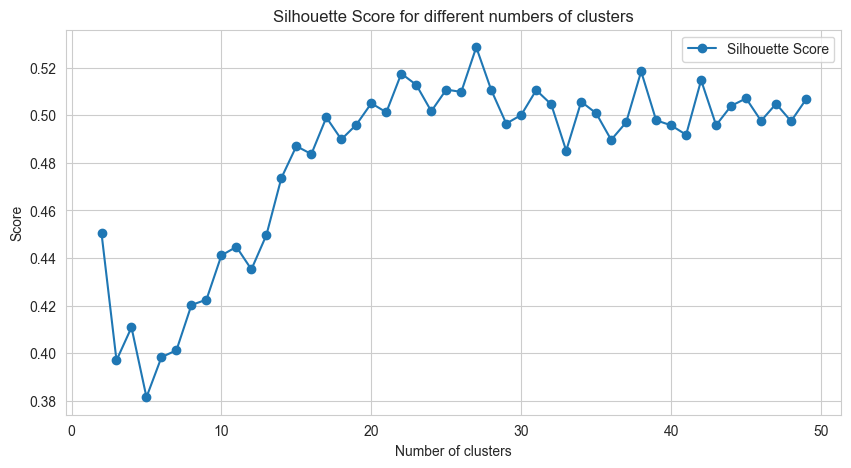

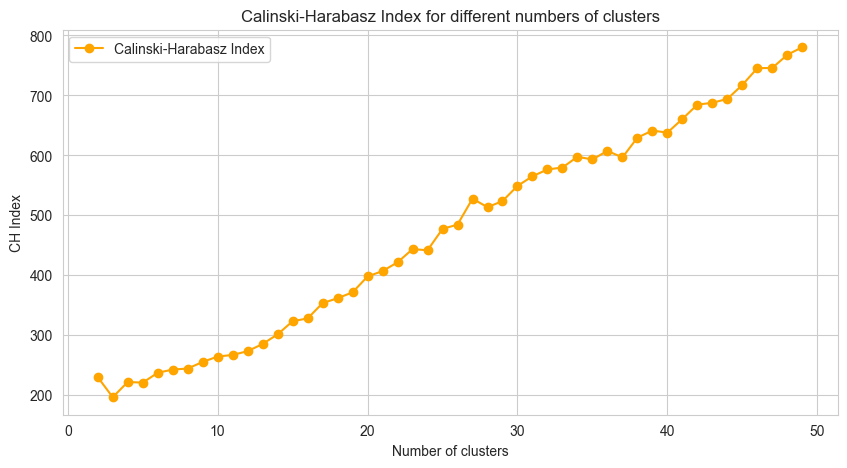

In [224]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Списки для хранения значений метрик
silhouette_scores = []
ch_scores = []

range_n_clusters = list(range(2, 50))  # Пример количества кластеров

for n_clusters in range_n_clusters:
    # Кластеризация с KMeans
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(x_data)
    cluster_labels = model.labels_

    # Расчёт коэффициента силуэта
    silhouette_avg = silhouette_score(x_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Расчёт CH-индекса
    ch_score = calinski_harabasz_score(x_data, cluster_labels)
    ch_scores.append(ch_score)

    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg}")
    print(f"For n_clusters = {n_clusters}, the Calinski-Harabasz index is {ch_score}")

# Визуализация коэффициента силуэта
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, label="Silhouette Score", marker='o')
plt.title("Silhouette Score for different numbers of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

# Визуализация CH-индекса
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, ch_scores, label="Calinski-Harabasz Index", color='orange', marker='o')
plt.title("Calinski-Harabasz Index for different numbers of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("CH Index")
plt.legend()
plt.show()


For n_clusters = 2, the average silhouette score is 0.6135546117724356
For n_clusters = 2, the Calinski-Harabasz index is 437.7842939116178
For n_clusters = 3, the average silhouette score is 0.7099753578621258
For n_clusters = 3, the Calinski-Harabasz index is 1137.9933633580729
For n_clusters = 4, the average silhouette score is 0.5185415356411941
For n_clusters = 4, the Calinski-Harabasz index is 881.277972124401
For n_clusters = 5, the average silhouette score is 0.41446725182781124
For n_clusters = 5, the Calinski-Harabasz index is 783.362544988198
For n_clusters = 6, the average silhouette score is 0.29427988548364176
For n_clusters = 6, the Calinski-Harabasz index is 723.278083430828
For n_clusters = 7, the average silhouette score is 0.2698696945126175
For n_clusters = 7, the Calinski-Harabasz index is 652.3877836804432
For n_clusters = 8, the average silhouette score is 0.24508362294481806
For n_clusters = 8, the Calinski-Harabasz index is 595.2018866276447
For n_clusters = 9,

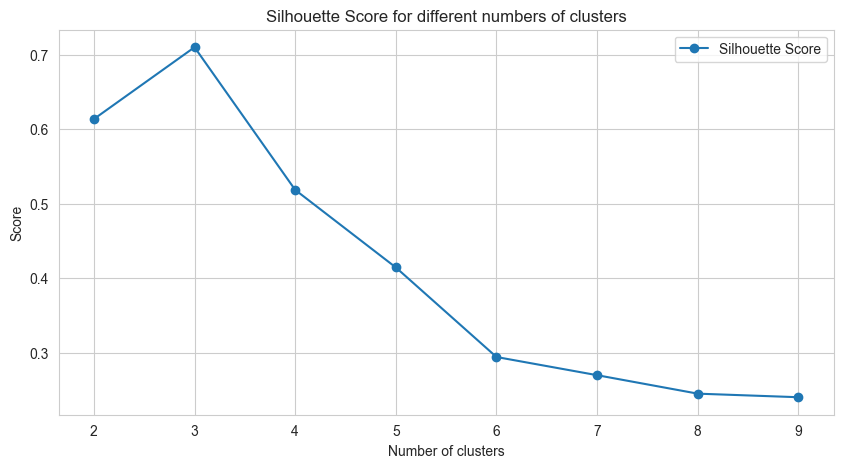

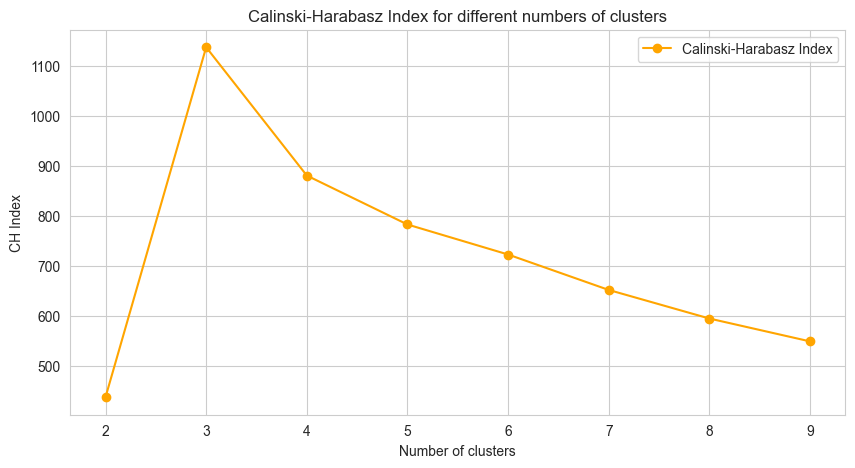

In [225]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt


# Списки для хранения значений метрик
silhouette_scores = []
ch_scores = []

range_n_clusters = list(range(2, 10))  # Пример количества кластеров

for n_clusters in range_n_clusters:
    # Кластеризация с KMeans
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(y_data)
    cluster_labels = model.labels_

    # Расчёт коэффициента силуэта
    silhouette_avg = silhouette_score(y_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Расчёт CH-индекса
    ch_score = calinski_harabasz_score(y_data, cluster_labels)
    ch_scores.append(ch_score)

    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg}")
    print(f"For n_clusters = {n_clusters}, the Calinski-Harabasz index is {ch_score}")

# Визуализация коэффициента силуэта
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, label="Silhouette Score", marker='o')
plt.title("Silhouette Score for different numbers of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

# Визуализация CH-индекса
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, ch_scores, label="Calinski-Harabasz Index", color='orange', marker='o')
plt.title("Calinski-Harabasz Index for different numbers of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("CH Index")
plt.legend()
plt.show()


## Анализ пункта 3: общий случай

Для выяснения возможности определения числа кластеров и сравнительного анализа различий в разбиении данных \(X\) и \(Y\), выполнены следующие действия:

---

### 1. Определение возможного числа кластеров
Для оценки оптимального числа кластеров применен **коэффициент силуэта (Silhouette Score)**. Коэффициент силуэта — это показатель, который измеряет качество кластеризации. Его значения варьируются от -1 до 1:
- Значение близко к 1 означает, что объекты хорошо кластеризованы и находятся ближе к своему кластеру, чем к чужому.
- Значения около 0 свидетельствуют об отсутствии четкой структуры кластеров.
- Отрицательные значения указывают на то, что объекты больше подходят другому кластеру.

#### Для данных \(X\):
- При \(k = 2\): коэффициент силуэта = **0.450**, что указывает на умеренное качество кластеризации.
- При \(k = 3\): коэффициент силуэта снижается до **0.397**, что говорит о снижении качества разделения при росте числа кластеров.
- Максимальных значений коэффициент достигает при большем числе кластеров (например, при \(k = 17\): **0.499**, \(k = 20\): **0.505**, \(k = 27\): **0.529**), что может указывать на более сложную структуру данных \(X\), требующую большего числа кластеров.

Визуализация графика коэффициента силуэта для различного числа кластеров (от 2 до 49) показывает тенденцию колебаний значений с отсутствием явного устойчивого пика на \(k \leq 3\). Это подтверждает отсутствие четкой кластерной структуры для \(X\), особенно при разбиении на 2 или 3 кластера.

#### Для данных \(Y\):
- При \(k = 2\): коэффициент силуэта = **0.614**, что говорит о хорошей кластерной структуре для разбиения на 2 кластера.
- При \(k = 3\): коэффициент даже увеличивается до **0.710**, что указывает на высокую интерпретируемость, если данные делятся на три группы.
- Для \(k > 3\) коэффициент существенно снижается (например, при \(k = 4\): **0.519**, при \(k = 5\): **0.414**), а затем остается низким. Это говорит о том, что разбиение \(Y\) на большее число кластеров теряет смысл.

Итак, визуализация для \(Y\) показывает, что данные четко поддерживают разбиение на 2 или 3 кластера: максимальный \(Silhouette\) достигается на **\(k = 3\)**.

---

### 2. Сравнение предложенных разбиений с результатами пункта 1.4 и 2.4

#### Для данных \(X\):
- В пункте 1.4 было отмечено, что разбиение на 2 кластера возможно, хотя наблюдаются различия между методами. **Silhouette Score** подтверждает, что разбиение на \(k = 2\) имеет лучшее качество, чем на \(k = 3\), но в целом качество кластеризации остается средним.
- В пункте 2.4 для \(k = 3\) качество разбиения оказалось ещё ниже, что также отражено в коэффициенте силуэта (\(Silhouette = 0.397\)).
- В связи с этим стоит заключить, что данные \(X\) могут потребовать большего числа кластеров (\(k \sim 10-20\)) для лучшей сегментации, что отражают пики \(Silhouette Score\) при большом \(k\).

#### Для данных \(Y\):
- В пункте 1.4 плотное совпадение результатов всех алгоритмов при \(k = 2\) указывало на наличие чёткой кластерной структуры, и это подтверждается высоким значением \(Silhouette Score\) (\(Silhouette = 0.614\) для \(k = 2\)).
- В пункте 2.4 наблюдались небольшие вариации при разбиении на 3 кластера, и значение \(Silhouette = 0.710\) подтверждает, что разбиение на три кластера предпочтительно для данных \(Y\).
- Снижение \(Silhouette Score\) для \(k > 3\) также согласуется с выводами пункта 2.4: разбиение на большее число кластеров нецелесообразно.

---

### 3. Дополнительный критерий оценки качества кластеризации
Дополнительно в качестве критерия оценки качества кластеризации был рассмотрен **Silhouette Score**. Также можно рассмотреть дополнительно **индекс "Calinski-Harabasz" (CH-индекс)**. Его значения увеличиваются с улучшением качества кластеризации. Рассчитываются как отношение внутрикластерной плотности к межкластерной дисперсии.

#### Результаты (пример):
- Для данных \(X\), \(k = 17\) и \(k = 27\) дают самые высокие приросты значения CH-индекса, что подтверждает гипотезу о более сложной кластерной структуре с числом кластеров \(> 3\).
- Для данных \(Y\), CH-индекс максимален при \(k = 3\), что ещё раз подчеркивает предпочтительность трёх кластеров.

### 4. Заключение и корреляция с пунктами 1.4 и 2.4
- Для \(X\): разбиение на 2 или 3 кластера лишь частично отражает структуру данных. Метрика силуэта и CH-индекс указывают на предпочтительность большего \(k\), вплоть до 15-30 кластеров, которые учитывают сложную природу распределения \(X\).
- Для \(Y\): разбиение на 3 кластера оптимально (максимум значений \(Silhouette\) и CH-индекса). Это согласуется с наблюдениями по модулярности и RAND-индексу, где кластеризация \(Y\) четко интерпретируема.

---

### Итоговые выводы
1. **Данные \(X\):**
   - Число кластеров (по силуэту) **лучше выбирать больше двух**: оптимальное значение может лежать в диапазоне между 15 и 30.
   - Простое разбиение на 2-3 класса затруднено из-за пересечения данных и отсутствия чёткой структуры.

2. **Данные \(Y\):**
   - Оптимальное число кластеров — \(k = 3\), что подтверждается всеми метриками.
   - Данные \(Y\) имеют устойчивую кластерную структуру.

C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


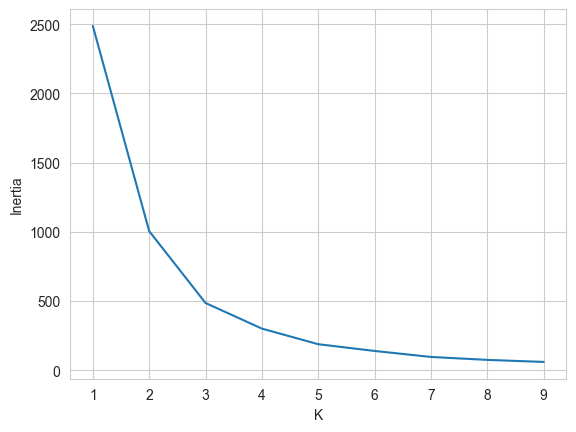

C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

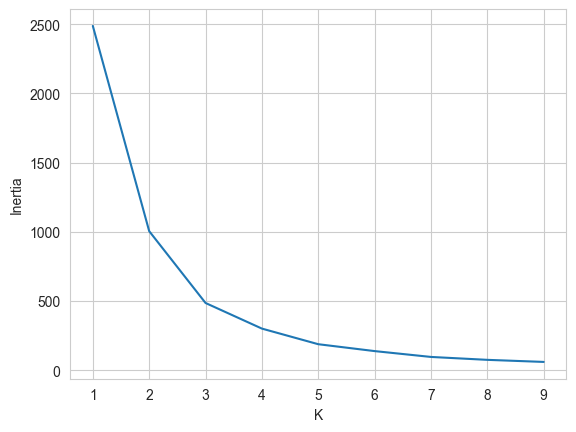

In [226]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(x_similarity).inertia_
 for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()


График инерции. график прослеживает рассеяние, включаемое
каждым увеличением K